<h1>IDA Lab Week7 Ex2: Text Analysis</h1>
<h2>By Smeet Dedhia Reg: 200968236</h2>
<h3>amazon_baby.csv dataset</h3>

In [1]:
#importing libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
AB = pd.read_csv(r"amazon_baby.csv") 
AB

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5


In [2]:
#Q12]Total count of reviews for each product stored in DataFrame AB_q1
AB_q1 = AB.groupby("name").count()
AB_q1

,review,rating
name,,
# 1 Digital Baby Thermometer - With FREE LIFETIME GUARANTEE: Using Non-Contact Infra Red (IR) Technology giving you instant and accurate temperature readings - Protect your BABY from FEVER and ILLNESS by using the DUAL Colour Digital Display and AUDIO ALARM function. Instant temperature reading from Baby Forehead within 1cm to 6cm distance - AUDIO Warning will trigger when temperature exceeds (37.5&#8451;) - Built in Memory to store 20 Readings - Fully FDA Approved &amp; (C.E.) Rated for Safety - Sold in one neat compact size 0.23kg weight. Durable Silicone touch buttons for durability - The non-contact design allows an instant temperature reading while your baby is sleeping. Can also be used to take the temperature of Baby Milk Bottles - In STOCK &amp; SHIPS today for FREE with Amazon.com,4,4
"#1 Adjustable Back Seat Baby Safety Mirror - Easy To Fit - Mirror Attaches In Seconds To Rear Seat Head Rest And Rotates And Pivots For A Clear View - Designed To Help You See Your Baby When They Are In A Reward Facing Car Seat, Without You Having To Turn Your Head Whilst Driving - No Obstruction To Rear View Visibility - High Quality Material - Best Life Time Guarantee - Top Selling Baby Safety Product From Happy Snuggle",1,1
"#1 Baby Bottle Brush for All Types of Bottles &#9733; Baby Feeder Nipple Cleaner Brush with Small, Long Plastic Grip Hanging Loop Handle &#9733; Ergonomic Safe Bristle Heads for All Types of Water, Beer, Wine Bottles and Cups &#9733; Best Bottle Cleaner for All Types of Small and Long Bottles with Narrow Neck &#9733; Finest Nipple Brush and Best Feeder Brush for Baby Bottles &#9733; Order High Quality Product with Lifetime Guarantee &#9733;",3,3
"#1 Premium Baby Nasal Aspirator by Cutietots - The Snot Sucker That Clears Away Baby\'s Stuffy Nose Gently and Instantly - Easy to Clean, Hygienic, BPA and Latex FREE - Great for Baby Showers with Its Lovely Packaging - Works Well with Nasal Saline Solutions - 100% Satisfaction Money Back Guarantee!!!",4,4
#120 - 2.5mm Dr Mom Specula Tips - Premium Quality,2,2
...,...,...
"zCush Cotton Characters Nap Mat, Googly Green",1,1
"zTcase&trade; Bluetooth Wireless Keyboard Case Cover for Samsung Galaxy Tab Pro 10.1 SM-T520 High Quality Folio Type for Professional and Personal Use (Tab Pro 10.1 inch, Black)",1,1
"zutano for aden by aden + anais 100% Cotton Muslin Burpy Bib, Walk In The Park",2,2


In [3]:
#Q13 Storing products with more than 15 reviews in DataFrame AB_q2
AB_q2 = AB_q1[AB_q1["review"]>15]
AB_q2

,review,rating
name,,
&quot;A Little Pillow Company&quot; Hypoallergenic TODDLER PILLOW in White - 13&quot;x18&quot; (Ages 2 - 4),32,32
(1) Cresci Products Window Wedge (2 Per Pack) WHITE color,25,25
*SPECIAL PROMOTION*The Art of CureTM *SAFETY KNOTTED* Honey - Certified Baltic Amber Baby Teething Necklace w/The Art of CureTM Jewelry Pouch (SHIPS AND SOLD IN USA),62,63
*The Art of CureTM *SAFETY KNOTTED* - Mixed Colors - Certified Baltic Amber Baby Teething Necklace - w/The Art of CureTM Jewelry Pouch (SHIPS AND SOLD IN THE USA),24,24
*The Art of CureTM *SAFETY KNOTTED* Lemon - Certified Baltic Amber Baby Teething Necklace w/&quot;THE ART OF CURETM&quot; Jewelry Pouch (SHIPS AND SOLD IN USA),21,21
...,...,...
myBaby Soundspa Lullaby Sound Machine and Projector,87,89
mybaby HoMedics SoundSpa On-The-Go,57,57
"phil&amp;teds Lobster Highchair, Red",31,31


In [4]:
#Q14]Checking the missing values
AB.isnull().sum()

name      318
review    829
rating      0
dtype: int64

In [5]:
#Removing missing values
AB.dropna(subset=["name", "review"], inplace=True)

In [6]:
#Verified that no missing values remain
AB.isnull().sum()

name      0
review    0
rating    0
dtype: int64

In [7]:
#Cleaning data as per Q15]
#dictionary of common contractions
contractions = {
"a'ight":"alright",
"ain't":"are not",
"amn't":"am not",
"aren't":"are not",
"can't":"cannot",
"'cause": "because",
"could've":"could have",
"couldn't":"could not",
"couldn't've":"could not have",
"daren't":"dare not",
"daresn't":"dare not",
"dasn't":"dare not",
"didn't":"did not",
"doesn't":"does not",
"don't":"do not",
"everybody's":"everybody is",
"everyone's":"everyone is",
"giv'n":"given",
"gonna":"going to",
"gon't":"go not", 
"gotta":"got to",
"hadn't":"had not",
"had've":"had have",
"hasn't":"has not",
"haven't":"have not",
"he'd":"he had", 
"he'll":"he will",
"he's":"he is",
"here's":"here is",
"how'd":"how did",
"how'll":"how will",
"how're":"how are",
"how's":"how is",
"I'd":"I had",
"I'd've":"I would have",
"I'd'nt":"I would not",
"I'd'nt've":"I would not have",
"I'll":"I will",
"I'm":"I am",
"I've":"I have",
"isn't":"is not",
"it'd":"it would",
"it'll":"it will",
"it's":"it is",
"let's":"let us",
"ma'am":"madam",
"mayn't":"may not",
"may've":"may have",
"mightn't":"might not",
"might've":"might have",
"mustn't":"must not",
"mustn't've":"must not have",
"must've":"must have",
"needn't":"need not",
"needn't've":"need not have",
"o'clock":"of the clock",
"oughtn't":"ought not",
"oughtn't've":"ought not have",
"shan't":"shall not",
"she'd":"she would",
"she'll":"she will",
"she's":"she is",
"should've":"should have",
"shouldn't":"should not",
"shouldn't've":"should not have",
"somebody's":"somebody is",
"someone's":"someone is",
"something's":"something is",
"so're":"so are",
"so’s":"so is",
"so’ve":"so have",
"that'll":"that will",
"that're":"that are",
"that's":"that is",
"that'd":"that would",
"there'd":"there would",
"there'll":"there will",
"there're":"there are",
"there's":"there is",
"these're":"these are",
"these've":"these have",
"they'd":"they would",
"they'll":"they will",
"they're":"they are",
"they've":"they have",
"this's":"this is",
"those're":"those are",
"those've":"those have",
"to've":"to have",
"wasn't":"was not",
"we'd":"we would",
"we'd've":"we would have",
"we'll":"we will",
"we're":"we are",
"we've":"we have",
"weren't":"were not",
"what'd":"what did",
"what'll":"what will",
"what're":"what are",
"what's":"what is",
"what've":"what have",
"when's":"when is",
"where'd":"where did",
"where'll":"where will",
"where're":"where are",
"where's":"where is",
"where've":"where have",
"which'd":"which would",
"which'll":"which will",
"which're":"which are",
"which's":"which is",
"which've":"which have",
"who'd":"who would",
"who'd've":"who would have",
"who'll":"who will",
"who're":"who are",
"who's":"who is",
"who've":"who have",
"why'd":"why did",
"why're":"why are",
"why's":"why is",
"won't":"will not",
"would've":"would have",
"wouldn't":"would not",
"wouldn't've":"would not have",
"y'at":"you at",
"yes’m":"yes madam",
"you'd":"you would",
"you'll":"you will",
"you're":"you are",
"you've":"you have"}

In [8]:
def contract_to_expand(x):
    if type(x) is str:
        x = x.replace('\\','')
        for key in contractions:
            value = contractions[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [9]:
#Replacing contractions with expansions
AB["review"] = AB["review"].apply(lambda x:contract_to_expand(x))

In [10]:
#Dictionary of punctuations
punctuation = {".":"", ",":"", "'":"", "?":"", "!":"", ":":"", ";":"", "-":"", "_":"", "(":"", ")":"", 
       }

In [11]:
def remove_punctuation(x):
    if type(x) is str:
        for key in punctuation:
            value = punctuation[key]
            x = x.replace(key, value)
        return x
    else:
        return x

In [12]:
#Removing punctuations from reviews
AB["review"] = AB["review"].apply(lambda x:remove_punctuation(x))

In [13]:
def upper_to_lower(x):
    x = x.lower()
    return x

In [14]:
#Changing uppercase letters to lowercase
AB["review"] = AB["review"].apply(lambda x:upper_to_lower(x))

In [15]:
from textblob import TextBlob

In [16]:
#Q16] Calculating he Polarity,length of the review,word count
AB['polarity'] = AB['review'].apply(lambda x: TextBlob(x).sentiment.polarity)
AB['review_len'] = AB['review'].apply(lambda x:len(x))
AB['word_count'] = AB['review'].apply(lambda x: len(x.split()))


In [17]:
def avg_word_len(x):
    words = x.split()
    if(len(words) ==0):
        return 0
    else:
        word_len = 0
        for word in words:
            word_len = word_len + len(word)
        return word_len/len(words)    

In [18]:
#Computing the average word length of each review
AB["avg_word_len"] = AB['review'].apply(lambda x: avg_word_len(x))

array([[<AxesSubplot:title={'center':'word_count'}>]], dtype=object)

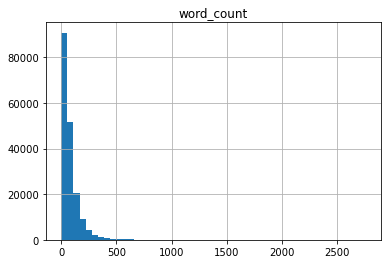

In [19]:
#Q17]Visualisation of Distribution of wordcount
AB.hist(column = "word_count",bins =50)


array([[<AxesSubplot:title={'center':'review_len'}>]], dtype=object)

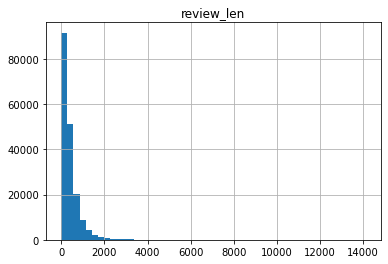

In [20]:
#Q17]Visualisation of Distribution of word length
AB.hist(column = "review_len",bins = 50)

array([[<AxesSubplot:title={'center':'polarity'}>]], dtype=object)

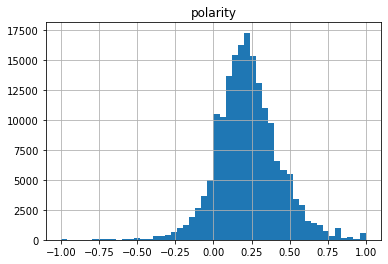

In [21]:
#Q17]Visualisation of Distribution of polarity
AB.hist(column = "polarity",bins = 50)

Text(0.5, 1.0, 'Polarity distribution by rating')

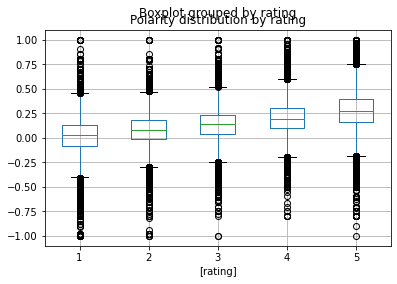

In [22]:
#Q18]Visualising the polarity considering the rating using Boxplot
AB.boxplot(column = ["polarity"], by = ["rating"]).set_title("Polarity distribution by rating")

Polarity for ratings of 2 or 3 is around 0.
Polarity is positive for ratings of 4 or 5.
Polarity is negative for rating of 1.

<AxesSubplot:>

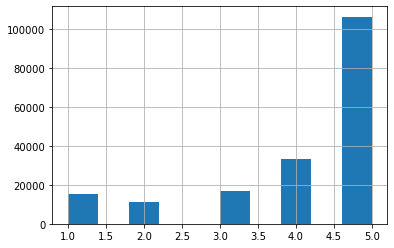

In [23]:
#Q19] Visualising the count of the reviews of each rating using a histogram
AB.rating.hist()

4 and 5 star ratings have the most reviews.<br>
While 1 and 2 star ratings are few...<br>
Perhaps, customers who are very impression with the product prefer to share their experience<br>
While those having a bad experience just give a 1 star rating and move on

In [24]:
#Q20] Top 20 products based on polarity
AB.sort_values(by=['polarity'], ascending=False).iloc[0:20,:][['name', 'polarity', 'rating']]

,name,polarity,rating
49479,Graco Humidifier Replacement Filter for 4.0 Ga...,1.0,5
48557,"Good Wood Eggs, Six in a Recyclable Carton (ch...",1.0,5
71634,"Summer Infant Metal Expansion Gate, 6 Foot Wid...",1.0,5
68875,"Starting Small Monkey Novelty Hamper in Brown,...",1.0,4
96803,"Orbelle 3-6T Toddler Bed, Natural",1.0,5
38466,Graco Pack \'N Play Playard with Bassinet in R...,1.0,5
48961,"Sugarbooger Baby Closet Dividers, Peek-A-Boo Blue",1.0,5
163012,Maclaren Mark II Stroller Midnight Navy,1.0,5
176587,"Jeep Perfect Pockets Back Pack, Black",1.0,5
151568,Taggies Buddy Dog Cozy Blanket,1.0,5


In [25]:
groupedby_rating_mean = AB.groupby('rating').mean()
groupedby_rating_mean["review_len"]

rating
1    460.586159
2    495.295000
3    480.940138
4    478.037576
5    378.490500
Name: review_len, dtype: float64

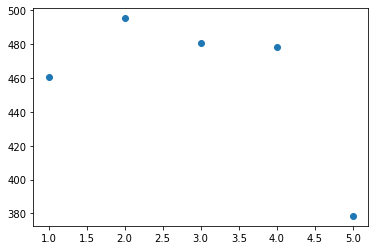

In [26]:
plt.scatter(groupedby_rating_mean.index, groupedby_rating_mean.review_len)

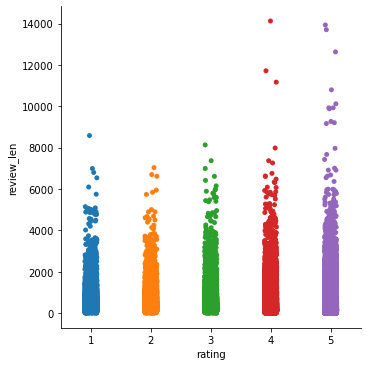

In [27]:
#Q21] Using catplot to check if review length changes with rating
sns.catplot(x='rating', y='review_len', data=AB)

Review length does change with rating.<br>
4 and 5 star ratings have longer reviews<br>
1 and 2 star ratings have shorter reviews<br>

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(x, n=None):
    vec = CountVectorizer(stop_words='english').fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [29]:
common_words = get_top_n_words(AB['review'], 25)
common_words

[('baby', 72003),
 ('great', 57978),
 ('just', 55910),
 ('use', 52141),
 ('like', 50835),
 ('love', 43313),
 ('seat', 42586),
 ('little', 41403),
 ('easy', 40231),
 ('old', 36824),
 ('does', 36455),
 ('really', 34804),
 ('product', 33239),
 ('time', 32184),
 ('did', 31880),
 ('bought', 31544),
 ('son', 29294),
 ('good', 28909),
 ('months', 25673),
 ('stroller', 25488),
 ('daughter', 25050),
 ('used', 23602),
 ('car', 23075),
 ('loves', 22353),
 ('recommend', 20604)]

In [30]:
Unigram = pd.DataFrame(common_words, columns = ['Unigram Text' , 'Count'])
Unigram

,Unigram Text,Count
0,baby,72003
1,great,57978
2,just,55910
3,use,52141
4,like,50835
5,love,43313
6,seat,42586
7,little,41403
8,easy,40231
9,old,36824


<AxesSubplot:xlabel='Unigram Text'>

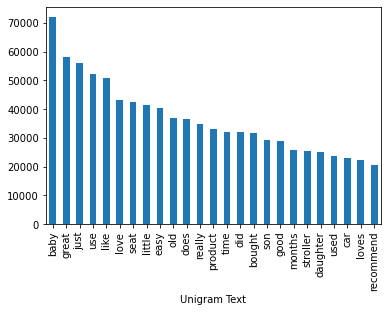

In [31]:
#Q22] Visualisation of Top 25 Unigram
Unigram.groupby('Unigram Text').sum()['Count'].sort_values(ascending=False).plot(kind='bar')

In [32]:
def get_top_n_bigram(x, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [33]:
common_words = get_top_n_bigram(AB['review'], 25)
common_words

[('car seat', 12023),
 ('month old', 10677),
 ('year old', 8774),
 ('months old', 6706),
 ('highly recommend', 5884),
 ('diaper bag', 4889),
 ('easy clean', 4720),
 ('easy use', 4578),
 ('works great', 3750),
 ('great product', 3596),
 ('really like', 2964),
 ('son loves', 2931),
 ('make sure', 2903),
 ('daughter loves', 2817),
 ('high chair', 2707),
 ('easy install', 2664),
 ('old son', 2435),
 ('good quality', 2413),
 ('recommend product', 2398),
 ('baby shower', 2251),
 ('definitely recommend', 2191),
 ('customer service', 2177),
 ('old loves', 2052),
 ('old daughter', 2031),
 ('baby loves', 1944)]

In [34]:
Bigram = pd.DataFrame(common_words, columns = ['Bigram Text' , 'Count'])
Bigram

,Bigram Text,Count
0,car seat,12023
1,month old,10677
2,year old,8774
3,months old,6706
4,highly recommend,5884
5,diaper bag,4889
6,easy clean,4720
7,easy use,4578
8,works great,3750
9,great product,3596


<AxesSubplot:xlabel='Bigram Text'>

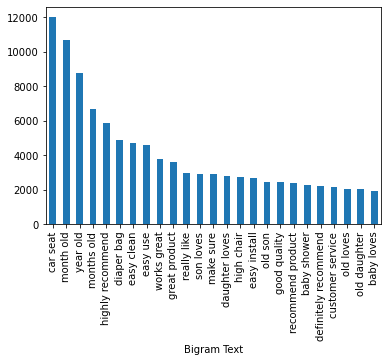

In [35]:
#Q22] Visualisation of Top 25 Bigram Texts

Bigram.groupby('Bigram Text').sum()['Count'].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='Bigram Text'>

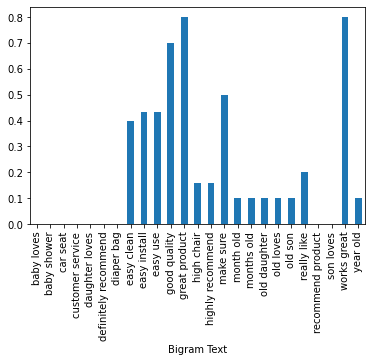

In [36]:
Bigram['polarity'] = Bigram['Bigram Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
Bigram.groupby('Bigram Text').sum()['polarity'].plot(kind='bar')

array([[<AxesSubplot:title={'center':'polarity'}>]], dtype=object)

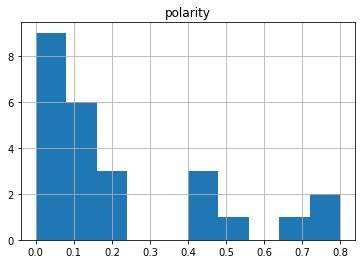

In [37]:
Bigram.hist(column = "polarity")

In [38]:
def get_top_n_trigram(x, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words="english").fit(x)
    bag_of_words = vec.transform(x)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [39]:
common_words2 = get_top_n_trigram(AB['review'], 25)
Trigram = pd.DataFrame(common_words2, columns = ['Trigram Text' , 'Count'])
Trigram

,Trigram Text,Count
0,month old son,1212
1,month old daughter,975
2,son months old,849
3,month old loves,804
4,baby shower gift,798
5,highly recommend product,758
6,love love love,678
7,year old son,678
8,daughter months old,659
9,year old daughter,627


<AxesSubplot:xlabel='Trigram Text'>

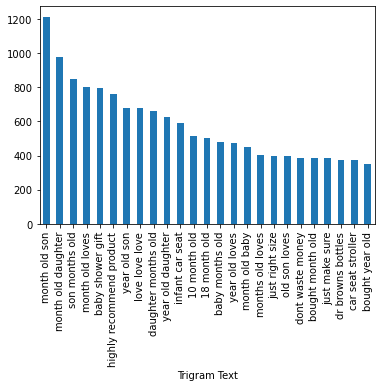

In [40]:
#Q22] Visualisation of Top 25 Bigram Texts
Trigram.groupby('Trigram Text').sum()['Count'].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='Trigram Text'>

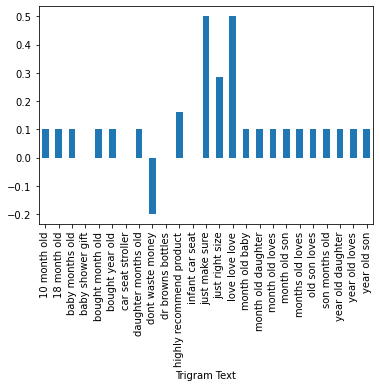

In [41]:
Trigram['polarity'] = Trigram['Trigram Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
Trigram.groupby('Trigram Text').sum()['polarity'].plot(kind='bar')

In [43]:
AB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182384 entries, 0 to 183530
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   name          182384 non-null  object 
 1   review        182384 non-null  object 
 2   rating        182384 non-null  int64  
 3   polarity      182384 non-null  float64
 4   review_len    182384 non-null  int64  
 5   word_count    182384 non-null  int64  
 6   avg_word_len  182384 non-null  float64
dtypes: float64(2), int64(3), object(2)
memory usage: 15.2+ MB


In [44]:
AB.rating = AB.rating.astype('object')
AB.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182384 entries, 0 to 183530
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   name          182384 non-null  object 
 1   review        182384 non-null  object 
 2   rating        182384 non-null  object 
 3   polarity      182384 non-null  float64
 4   review_len    182384 non-null  int64  
 5   word_count    182384 non-null  int64  
 6   avg_word_len  182384 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 15.2+ MB


In [45]:
AB

,name,review,rating,polarity,review_len,word_count,avg_word_len
0,Planetwise Flannel Wipes,these flannel wipes are ok but in my opinion n...,3,0.083333,443,79,4.594937
1,Planetwise Wipe Pouch,it came early and was not disappointed i love ...,5,0.367000,154,30,4.166667
2,Annas Dream Full Quilt with 2 Shams,very soft and comfortable and warmer than it l...,5,0.293333,137,23,5.000000
3,Stop Pacifier Sucking without tears with Thumb...,this is a product well worth the purchase i h...,5,0.318767,380,74,4.094595
4,Stop Pacifier Sucking without tears with Thumb...,all of my kids have cried nonstop when i tried...,5,0.577778,392,76,4.131579
...,...,...,...,...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,such a great idea very handy to have and look ...,5,0.546000,133,27,3.962963
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,this product rocks it is a great blend of fun...,5,0.440625,347,64,4.406250
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),this item looks great and cool for my kidsi kn...,5,0.650000,86,17,4.117647
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",i am extremely happy with this product i have ...,5,0.379694,846,170,3.982353


In [47]:
AB2 = pd.DataFrame(columns=['rating','positive polarity', 'negative polarity', 'avg polarity']);
AB2['rating'] = [1,2,3,4,5]
AB2

,rating,positive polarity,negative polarity,avg polarity
0,1,NaN,NaN,NaN
1,2,NaN,NaN,NaN
2,3,NaN,NaN,NaN
3,4,NaN,NaN,NaN
4,5,NaN,NaN,NaN


In [48]:
AB2.loc[AB2.rating==1,'positive polarity'] = AB.loc[(AB.rating==1) & (AB.polarity>0), 'polarity'].mean()
AB2.loc[AB2.rating==2,'positive polarity'] = AB.loc[(AB.rating==2) & (AB.polarity>0), 'polarity'].mean()
AB2.loc[AB2.rating==3,'positive polarity'] = AB.loc[(AB.rating==3) & (AB.polarity>0), 'polarity'].mean()
AB2.loc[AB2.rating==4,'positive polarity'] = AB.loc[(AB.rating==4) & (AB.polarity>0), 'polarity'].mean()
AB2.loc[AB2.rating==5,'positive polarity'] = AB.loc[(AB.rating==5) & (AB.polarity>0), 'polarity'].mean()

AB2.loc[AB2.rating==1,'negative polarity'] = AB.loc[(AB.rating==1) & (AB.polarity<0), 'polarity'].mean()
AB2.loc[AB2.rating==2,'negative polarity'] = AB.loc[(AB.rating==2) & (AB.polarity<0), 'polarity'].mean()
AB2.loc[AB2.rating==3,'negative polarity'] = AB.loc[(AB.rating==3) & (AB.polarity<0), 'polarity'].mean()
AB2.loc[AB2.rating==4,'negative polarity'] = AB.loc[(AB.rating==4) & (AB.polarity<0), 'polarity'].mean()
AB2.loc[AB2.rating==5,'negative polarity'] = AB.loc[(AB.rating==5) & (AB.polarity<0), 'polarity'].mean()

AB2.loc[AB2.rating==1,'avg polarity'] = AB.loc[(AB.rating==1), 'polarity'].mean()
AB2.loc[AB2.rating==2,'avg polarity'] = AB.loc[(AB.rating==2), 'polarity'].mean()
AB2.loc[AB2.rating==3,'avg polarity'] = AB.loc[(AB.rating==3), 'polarity'].mean()
AB2.loc[AB2.rating==4,'avg polarity'] = AB.loc[(AB.rating==4), 'polarity'].mean()
AB2.loc[AB2.rating==5,'avg polarity'] = AB.loc[(AB.rating==5), 'polarity'].mean()

AB2

,rating,positive polarity,negative polarity,avg polarity
0,1,0.148541,-0.162166,0.017836
1,2,0.163243,-0.12353,0.081994
2,3,0.192987,-0.105481,0.142703
3,4,0.235626,-0.08895,0.209667
4,5,0.308855,-0.098975,0.289492


<AxesSubplot:title={'center':'Rating vs Polarity'}, xlabel='rating', ylabel='polarity'>

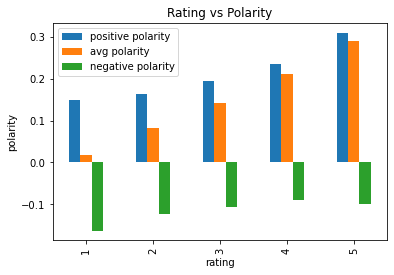

In [49]:
AB2.plot.bar(title='Rating vs Polarity',x='rating', y=['positive polarity', 'avg polarity','negative polarity'], ylabel='polarity')